<a href="https://colab.research.google.com/github/dpkeee/Udacity_DeepLearning_Nanodegree/blob/master/dog_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2020-06-14 05:20:12--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.112
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  21.0MB/s    in 53s     

2020-06-14 05:21:05 (20.5 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [2]:
!unzip dogImages.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03418.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03421.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03423.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03424.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03425.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03426.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03428.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03430.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03431.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03432.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03433.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03435.jpg  
  inflating: dogImages/train/048.Chihua

In [3]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

--2020-06-14 05:22:44--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.64
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  20.6MB/s    in 9.9s    

2020-06-14 05:22:55 (19.0 MB/s) - ‘lfw.zip’ saved [196739509/196739509]



In [4]:
!unzip lfw.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0004.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/._Steffi_Graf  
   creating: lfw/Stella_Keitel/
  inflating: lfw/Stella_Keitel/Stella_Keitel_0001.jpg  
   creating: __MACOSX/lfw/Stella_Keitel/
  inflating: __MACOSX/lfw/Stella_Keitel/._Stella_Keitel_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_Keitel  
   creating: lfw/Stella_McCartney/
  inflating: lfw/Stella_McCartney/Stella_McCartney_0001.jpg  
   creating: __MACOSX/lfw/Stella_McCartney/
  inflating: __MACOSX/lfw/Stella_McCartney/._Stella_McCartney_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_McCartney  
   creating: lfw/Stella_Tennant/
  inflating: lfw/Stella_Tenn

In [12]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


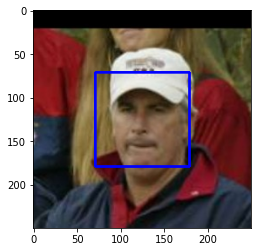

In [19]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               
 
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('/content/haarcascade.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ human 99% dog 50%
(You can print out your results and/or write your percentages in this cell)

In [21]:

from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_classified_correctly=0
human_classified_incorrectly=0
for i in (human_files_short):
    if face_detector(i):
        human_classified_correctly+=1
for i in (dog_files_short):
    if face_detector(i):
        human_classified_incorrectly+=1
print("Percentage of humans correctly classified ",(human_classified_correctly)/len(human_files_short)*100)


print("Percentage of humans incorrectly classified ",(human_classified_incorrectly)/len(dog_files_short)*100)

Percentage of humans correctly classified  99.0
Percentage of humans incorrectly classified  50.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

# Optional Task using LBP Classifier

human 97% dog 18%

In [0]:
import cv2
lbp_cascade=cv2.CascadeClassifier('/content/lbp.xml')

In [0]:
def lbp_detector(img_path):
    lbp_face = 0
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = lbp_cascade.detectMultiScale(gray)
    if len(faces)> 0:
      lbp_face = 1
    return lbp_face

In [0]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_count = 0
total_count_h = 0
total_count_d = 0

for human in human_files_short:
    human_yes = 0
    human_yes = lbp_detector(human)
    if human_yes:
        human_count+=human_yes
    total_count_h+=1 
h_accuracy = (human_count/total_count_h)*100
print(h_accuracy)            
#print(human_count)


dog_count = 0
total_count_d = 0
for dog in dog_files_short:
    dog_yes = lbp_detector(dog)
    if dog_yes:
        dog_count+=dog_yes
    total_count_d+=1
d_accuracy = (dog_count/total_count_d)*100
print(d_accuracy)
#print(dog_count)

97.0
18.0


In [0]:
print("Percentage of humans correctly classified is {}".format(h_accuracy))


print("Percentage of humans incorrectly classified is {} ".format(d_accuracy))

Percentage of humans correctly classified is 97.0
Percentage of humans incorrectly classified is 18.0 


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms
import torch
from torchvision import datasets

def VGG16_predict(img_path):
  '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
  '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
   # return None # predicted class index
  
  VGG16.eval()
  img = Image.open(img_path)
  transform = transforms.Compose([transforms.Resize(255),
                                    transforms.CenterCrop(224),
                                    transforms.RandomRotation(30),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) 
    
  image_tensor = transform(img) 
  batch_d = torch.unsqueeze(image_tensor, 0)
  if train_on_gpu:
    batch_d = batch_d.cuda()
    model_transfer.cuda()
  output = VGG16(batch_d)
  output_idx= torch.argmax(output,dim=1)
  
  return output_idx




   
    
    


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    dog = False
    detection = VGG16_predict(img_path)
    if detection in range(151,269):
      dog = True
    return dog

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  percentage of the images in human_files_short have a detected dog is 0.                        
 percentage of the images in dog_files_short have a detected dog is 98%


In [26]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.



human_files_dog_detections = np.sum([dog_detector(i) for i in human_files_short])
dog_files_dog_detections = np.sum([dog_detector(i) for i in dog_files_short])

print(human_files_dog_detections)    

0


In [27]:
print(dog_files_dog_detections)

98


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [28]:
dog_files_dog_detections

98

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import os
from torchvision import datasets,transforms
import torch.nn as nn 
import torch


### TODO: Write loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

transforms = transforms.Compose([transforms.Resize(255),
transforms.CenterCrop(224),
transforms.RandomRotation(30),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) 

In [23]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
train_set = datasets.ImageFolder('/content/dogImages/train', transform = transforms)
val_set = datasets.ImageFolder('/content/dogImages/valid', transform = transforms)
test_set = datasets.ImageFolder('/content/dogImages/test',transform = transforms)

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

In [0]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=True)

In [0]:
val_loader =  torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=True)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:I have resized the images to 255 . I have done resizing, inorder to maintain uniformity across all the images, because the input images can come in different sizes . I have chosen centre crop 224, so that the input is finally  224 * 224 size as VGG16 input size.                                                       
                                               Data augmentation is a very useful technique used during training.
In real life scenarios, when the images come in different orientations the model performs better as it has already been  trained on images with different orientaions thereby improving the efficiency of the model. I have used Random Rotation transform with 30 degree angle, so that all the input images are trasformed and trained accordingly.                                                    


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
      # convolutional layer (sees 224x224x3 image tensor)
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,16,3,padding = 1)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.conv3 = nn.Conv2d(32,64,3,padding=1)
        self.conv4 = nn.Conv2d(64,128,3,padding=1)
        self.conv5 = nn.Conv2d(128,256,3,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (256 * 7 * 7 -> 1028)
        #self.fc1 = nn.Linear(64 * 28 * 28, 500)
        self.fc1 = nn.Linear(256 * 7 * 7, 1028)
        # linear layer (500 -> 133)
        self.fc2 = nn.Linear(1028, 500)
        # dropout layer (p=0.25)
        self.fc3 = nn.Linear(500, 133)
        self.dropout = nn.Dropout(0.3)


    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        # flatten image input
#        print(x.shape)
        #x = x.view(-1, 64 * 28 * 28)
        x = x.view(-1, 256 * 7 * 7)
        # add dropout layer
        x = self.dropout(x)
#        print(x.view(x.size(0), -1))
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

         
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
I have used 5 convolutional layers and 3 fully connected layers in my model.

Using Convolution layers is very advantageous, as they decrease the number of parameters for training. The filters in the convolution layers filter out the unwanted information and amplify features of interest.

Due to the parameter sharing the filters useful in one part of the image can also be useful in a different part of the image.

Convolution layer takes input in the form (input_channel,Output_channel,Kernel_size,padding).Stride by default is 1. Since the input id colored image it has 3 channels(RGB). I have taken 32 filters in the first conv1 layer to get the feature maps. I kept increasing the size of output channels by 2. 

After each layer I used ReLU activation function to introduce non-linearity followed by MaxPooling Layers (2x2), I also used padding =1 to keep dimensions balanced after applying MaxPool2d.

After the convolution layers, I introduced fully connected layers to complete the model.Now the output of the last convolution layer is the input to the first fc layer. I calculated the no of parameters which output from the Convolution layer 5 and gave it as input to the first fully connected layer.

I have also used Dropout to minimize overfitting.  The number of  output channels  of the last fully connected layers is 133 which is no of breeds.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(),lr=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
loaders_scratch = {'train': train_loader , 'valid': val_loader, 'test':test_loader }

In [0]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer_scratch.zero_grad()  
             
            output = model_scratch(data)

            loss = criterion_scratch(output,target)

            loss.backward()

            optimizer_scratch.step()


            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass
            output = model(data)
            
            # batch loss
            loss = criterion(output, target)
            
            # update validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model_scratch.state_dict(), save_path)
            valid_loss_min = valid_loss    
    # return trained model
    return model




In [0]:
# train the model
model_scratch = train(35, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, train_on_gpu, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.887174 	Validation Loss: 4.880068
Validation loss decreased (inf --> 4.880068).  Saving model ...
Epoch: 2 	Training Loss: 4.876326 	Validation Loss: 4.869728
Validation loss decreased (4.880068 --> 4.869728).  Saving model ...
Epoch: 3 	Training Loss: 4.869943 	Validation Loss: 4.862514
Validation loss decreased (4.869728 --> 4.862514).  Saving model ...
Epoch: 4 	Training Loss: 4.863962 	Validation Loss: 4.855710
Validation loss decreased (4.862514 --> 4.855710).  Saving model ...
Epoch: 5 	Training Loss: 4.788259 	Validation Loss: 4.796279
Validation loss decreased (4.855710 --> 4.796279).  Saving model ...
Epoch: 6 	Training Loss: 4.671900 	Validation Loss: 4.679814
Validation loss decreased (4.796279 --> 4.679814).  Saving model ...
Epoch: 7 	Training Loss: 4.600293 	Validation Loss: 4.545743
Validation loss decreased (4.679814 --> 4.545743).  Saving model ...
Epoch: 8 	Training Loss: 4.513599 	Validation Loss: 4.519342
Validation loss decreased (4.54574

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [0]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, train_on_gpu)

Test Loss: 3.641344


Test Accuracy: 19% (161/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [25]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg19(pretrained=True)



if train_on_gpu:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth


In [0]:
for param in model_transfer.features.parameters():
  param.requires_grad=False

In [0]:
import torch.nn as nn

n_inputs = model_transfer.classifier[6].in_features
n_outputs = 133

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, n_outputs)

model_transfer.classifier[6] = last_layer

# if GPU is available, move the model to GPU
if train_on_gpu:
    model_transfer.cuda()

# check to see that your last layer produces the expected number of outputs
print(model_transfer.classifier[6].out_features)

133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I took the following steps:



I augmented the data using suitable transforms and divided created three sets -train,validation and test set.
I loaded the pretrained VGG19 model as I previously implemented it in the notebook and pretraind models saves a lot of our computation task.
I don't want the pretrained model's weight to be recalculated or altered so I set trainable =False for all the features.
Since , the VGG19 model is designed for ImageNet dataset , it classifies 1000 classes but inn our case we have only 133 classes so we have changed the calssifier here .
I used 3 Dense layers here , the first dense layer takes 25088 as input which was output of last convolutional layer .Finally the last layer(dense) has 133 output features.
This architecture is suitable for this problem since , VGG19 is trained on ImageNet dataset which is based on real world objects and most importantly consists dogs , it will be able to extract features properly to give feature vector and will save our computational task.We can just replace the classifier with our own classifer to make predictions.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [0]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            optimizer_transfer.zero_grad()  
             
            output = model_transfer(data)

            loss = criterion_transfer(output,target)

            loss.backward()

            optimizer_transfer.step()


            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass
            output = model_transfer(data)
            
            # batch loss
            loss = criterion(output, target)
            
            # update validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model_transfer.state_dict(), save_path)
            valid_loss_min = valid_loss    
    # return trained model
    return model



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# train the model
loaders_transfer = loaders_scratch
model_transfer =  train(15, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, train_on_gpu, 'dog_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)


Epoch: 1 	Training Loss: 2.053410 	Validation Loss: 0.945791
Validation loss decreased (inf --> 0.945791).  Saving model ...
Epoch: 2 	Training Loss: 0.915153 	Validation Loss: 0.744016
Validation loss decreased (0.945791 --> 0.744016).  Saving model ...
Epoch: 3 	Training Loss: 0.727597 	Validation Loss: 0.704231
Validation loss decreased (0.744016 --> 0.704231).  Saving model ...
Epoch: 4 	Training Loss: 0.621223 	Validation Loss: 0.693264
Validation loss decreased (0.704231 --> 0.693264).  Saving model ...
Epoch: 5 	Training Loss: 0.542020 	Validation Loss: 0.616855
Validation loss decreased (0.693264 --> 0.616855).  Saving model ...
Epoch: 6 	Training Loss: 0.493889 	Validation Loss: 0.620574
Epoch: 7 	Training Loss: 0.436614 	Validation Loss: 0.552684
Validation loss decreased (0.616855 --> 0.552684).  Saving model ...
Epoch: 8 	Training Loss: 0.390294 	Validation Loss: 0.589220
Epoch: 9 	Training Loss: 0.361806 	Validation Loss: 0.663331
Epoch: 10 	Training Loss: 0.312179 	Valida

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [0]:
test(loaders_transfer, model_transfer, criterion_transfer, train_on_gpu)

Test Loss: 0.629985


Test Accuracy: 80% (677/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
from PIL import Image
from torchvision import transforms
class_names = [item[4:].replace("_", " ") for item in loaders_scratch['train'].dataset.classes]

def predict_breed_transfer(img_path):
  
  model_transfer.eval()
  

  # load the image and return the predicted breed
  img = Image.open(img_path).convert('RGB')
  transform = transforms.Compose([transforms.Resize(255),
                                  transforms.CenterCrop(224),
                                  transforms.RandomRotation(30),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) 
    
  image_tensor = transform(img) 
  batch_t = torch.unsqueeze(image_tensor, 0)
   
  if train_on_gpu:
    batch_t = batch_t.cuda()
    model_transfer.cuda()
        
  output=model_transfer(batch_t)
  breed=torch.argmax(output)
  return class_names[breed]
    

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    plt.imshow(Image.open(img_path))
    plt.show()
    
    if lbp_detector(img_path):
      print("Hello, This is a a human and your breed is .......")
      breed=predict_breed_transfer(img_path)
      print(breed)
      print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    elif dog_detector(img_path):
       print("Hello, This is a dog")
       breed=predict_breed_transfer(img_path)
       print("and your breed is ",breed)
       print('******************************************')
   # else (lbp_detector(img_path)==False and dog_detector(img_path)==False):
    else:
       print("I can not find a human or dog here!")
       print('------------------------------------------')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 3 possible points for improvement might be :

Applying style transfer on the human_files which will transfer style from dog-filters(as seen in snapchat) to the human images . Our model will train and learn to classify humans more accurately.

We can mix dogs images with some other animals like wolf so that our model advances to predict more accurately.

We can use some other pretrained model which might give us better results.(such as ResNet-50 )

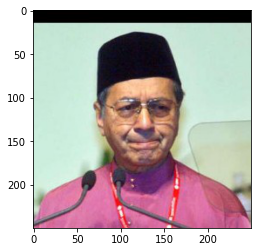

Hello, This is a a human and your breed is .......
English toy spaniel
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


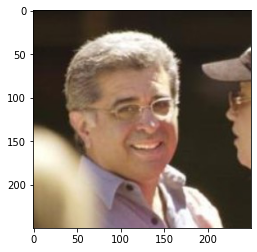

Hello, This is a a human and your breed is .......
Alaskan malamute
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


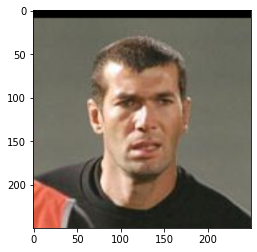

Hello, This is a a human and your breed is .......
Field spaniel
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


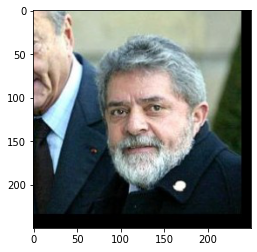

Hello, This is a a human and your breed is .......
Pharaoh hound
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


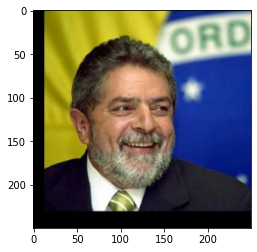

Hello, This is a a human and your breed is .......
Basenji
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


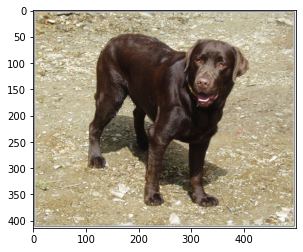

Hello, This is a dog
and your breed is  Labrador retriever
******************************************


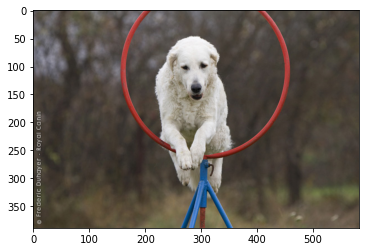

Hello, This is a a human and your breed is .......
Kuvasz
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


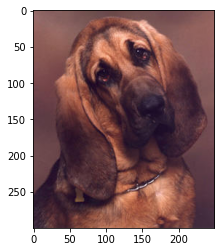

Hello, This is a dog
and your breed is  Bloodhound
******************************************


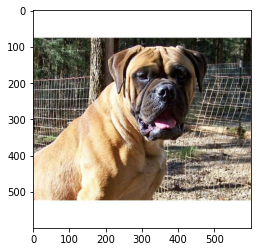

Hello, This is a dog
and your breed is  Bullmastiff
******************************************


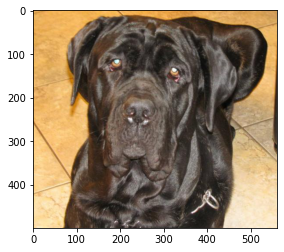

Hello, This is a dog
and your breed is  Mastiff
******************************************


In [0]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline
## suggested code, below
for file in np.hstack((human_files[50:100:10], dog_files[50:100:10])):
    run_app(file)